# Shapely and geometric objects

In this lesson, you will learn how to create and manipulate geometries in Python
using the [Shapely Python
Package](https://shapely.readthedocs.io/en/stable/manual.html).

**Sources:** Parts of this chapter are based on [shapely’s
documentation](https://shapely.readthedocs.io/) and on chapter 3 of [Westra E.
(2013)](https://www.packtpub.com/application-development/python-geospatial-development-second-edition).


## Spatial data model

:::{figure} https://raw.githubusercontent.com/Automating-GIS-processes/site/41a2c8d/docs/static/images/lesson-1/simple-features_595x500px.svg
:alt: Spatial data model

Fundamental geometric objects (‘simple features’) that can be used in Python
with [shapely](https://shapely.readthedocs.io/). <br /> *(Figures by M. W.
Toews; cf. [Wikipedia’s article on GeoJSON](https://en.wikipedia.org/wiki/GeoJSON))*
:::

All geospatial vector data can be described by a combining a set of fundamental
geometric objects: **points**, **lines**, and **polygons** are the basic
ingredients of working with spatial data.

In Python, the library package [shapely](https://shapely.readthedocs.io/) has
become the standard tool for working with geo-spatial objects, and for carruing
out a range of geometric operations. A basic understanding of how *shapely*
works is paramount for using higher-level tools, such as, for instance,
[geopandas](https://geopandas.pydata.org/) (see [lesson 2](../lesson-2/overview))
that handles entire data sets of geographic information (a.k.a. ‘layers’).


Shapely, like the vast majority of geospatial software, follows the data model
set forward in the [Open Geospatial Consortium’s *Simple Feature Access*
standard](https://www.ogc.org/standards/sfa). In this chapter, we use the
terminology used by *shapely*, but the general concepts are applicable much more
widely.


### Geometric objects are described and constructed by *coordinate tuples*

Even more fundamental than that, **coordinate tuples** are what is used to
define the geometric fundamentals point, line, and polygon. Coordinate tuples
typically are either two-dimensional `(x, y)`, or three-dimensional `(x, y, z)`.

:::{admonition} Tuples
:class: info

A [tuple](https://docs.python.org/3/tutorial/datastructures.html#tuples-and-sequences)
is a Python data structure that consists of a number of values separated by
commas. Coordinate pairs are often represented as a tuple. For example,
`(60.192059, 24.945831)` is a tuple with two values, `(1,)` a tuple with one
value (note the comma that distinguishes a one-value tuple from a mathematical
expression in parentheses), and `tuple([1, 2, 3])` converts (‘casts’) a `list`
into a `tuple`.

Tuples belong to the [sequence data
types](https://docs.python.org/3/library/stdtypes.html#typesseq) in Python.
Other sequence data types are lists and ranges. Tuples have many similarities
with lists and ranges, but they are often used for different purposes.

The main difference between tuples and lists is that tuples are
[immutable](https://docs.python.org/3/glossary.html#term-immutable), which means
that the contents of a tuple cannot be altered (while lists are mutable; you
can, for example, add and remove values from lists).

:::

### Points

**Point** geometries represent a singular point (in two- or three-dimensional
Euclidean space). Points are defined by a single coordinate tuple.

### LineStrings

**LineString** geometries (and the related **LinearRing**s) represent lines.
They are defined by a sequence of points. By connecting the points in order,
a line is formed, if the first and last point are the same, a linear ring.
Consequently, to describe a *LineString*, at least two points are necessary, 
for a *LinearRing* at least three (first and last being identical).

### Polygons

Finally, **Polygon** geometries represent an area. A polygon is defined by
exactly one *LinearRing* as its circumference, and any number of additional
*LinearRing*s representing holes that are cut out. As such, at minimum, three
coordinate tuples are needed to define a Polygon (but it becomes more difficult
quickly, as, naturally, the coordinates that define the holes have to lie within
the exterior *LinearRing*, and also must not intersect each other).


### Collections of geometric objects

All of the fundamental geometric types can be combined to represent more complex
geographic features, such as, for instance, administrative areas that consist of
multiple discontinuous regions:


:::{figure} https://raw.githubusercontent.com/Automating-GIS-processes/site/41a2c8d/docs/static/images/lesson-1/multipolygons_595x300px.svg
:name: MultiPolygons
:alt: A map of Austria showing that the province of Tyrol consists of two

*Tyrol*, a federal state of Austria, is a **MultiPolygon**. *(Data: [Statistics
Austria](https://data.statistik.gv.at/web/meta.jsp?dataset=OGDEXT_GEM_1))*
:::


- **MultiPoint** geometries represent collections of points.
- **MultiLineString** geometries represent collections of lines.
- **MultiPolygon** geometries represent collections of polygons.
- **GeometryCollection** geometries are collections of points,
  lines, and polygons, as well as multi-points, multi-lines,
  and multi-polygons.


## Using shapely to create, access, manipulate and analyse geometric objects

Shapely can perform many useful operations on geometries, and provides a range
of attributes of geometries. For instance, you can:
- create lines and polygons from a set of points
- calculate the area, length, perimeter, etc., of geometries
- perform geometric operations on a set of geometries, for instance, merging
  (`union`), subtracting (`difference`), or calculating the distance between
  geometries.
- query the relationship between geometries, i.e., find out whether two
  geometries intersect, touch, cross, etc.


### Creating `Point` geometries and accessing their properties

Creating a point geometry object is easy: simply pass coordinates (x, y, and
possibly z) to its [constructor](https://pythonbasics.org/constructor/).

In [2]:
pip install shapely

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


## Problem 1: Creating basic geometries
In this problem you will create custom-made functions for creating geometries. We start with a very simple function, and proceed to creating functions that can handle invalid input values. 

In [21]:
from shapely.geometry import Point
def create_point_geom(x_coord, y_coord): 
    point = Point(x_coord, y_coord) 
    return point

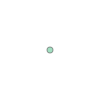

In [23]:
point1 = create_point_geom(0.0, 1.1)
point1

LINESTRING (45.2 22.34, 100.22 -3.2)


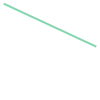

In [25]:
from shapely.geometry import LineString

def create_line_geom(points): 
    line = LineString(points) 
    return line


point1 = Point(45.2, 22.34)
point2 = Point(100.22, -3.20)
line1 = create_line_geom([point1, point2]) 
print(line1)
line1

POLYGON ((45.2 22.34, 100.22 -3.2, 70 10.2, 45.2 22.34))


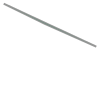

In [26]:
from shapely.geometry import Polygon


def create_poly_geom(coords): 
    polygon = Polygon(coords) 
    return polygon

coords = [(45.2, 22.34), (100.22, -3.20), (70.0, 10.20)]
polygon = create_poly_geom(coords) 
print(polygon)
polygon

## Problem 2: Attributes of geometries (*5 points*)

1: Create a function called `get_centroid()` that has one parameter called `geom`. The function should take any kind of Shapely's geometric -object as an input, and return a centroid of that geometry.

In [27]:
def get_centroid(geom): 
    centroid = geom.centroid 
    return centroid

POINT (71.80666666666667 9.780000000000001)


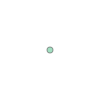

In [28]:
centroid = get_centroid(polygon)
print(centroid)
centroid

2: Create a function called get_area() with one parameter called polygon. Function should take a Shapely's Polygon -object as input and returns the area of that geometry.

In [29]:
def get_area(polygon): 
    area = polygon.area 
    return area

area = get_area(polygon)
print(round(area, 2))

17.28


3: Create a function called `get_length()` with parameter called `geom`. The function should accept either a Shapely LineString or Polygon -object as input. Function should check the type of the input and returns the length of 
the line if input is LineString

In [30]:
def get_length(polygon):
    length = polygon.length
    return length

line_length = get_length(line1)
print("Line length:", round(line_length, 2))

Line length: 60.66
